# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

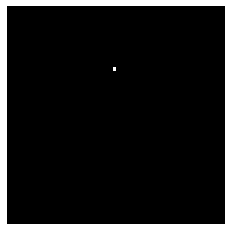

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

kwadraty = cv2.imread("kwadraty.png", cv2.IMREAD_GRAYSCALE)
lab = cv2.imread("lab112.png", cv2.IMREAD_GRAYSCALE)
dom = cv2.imread("dom.png", cv2.IMREAD_GRAYSCALE)

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')
plt.show()

Transformata powinna zostać obliczona dla punktu (18, 31).

3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

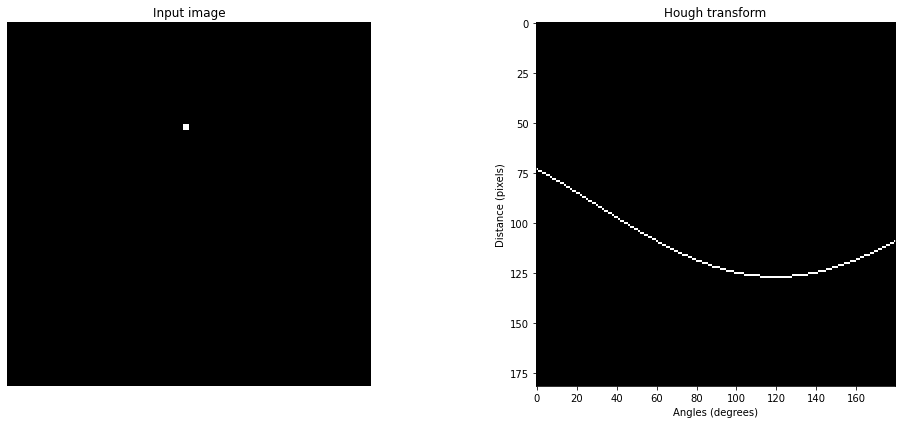

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    plt.tight_layout()
    plt.show()

H, theta, rho = hough_line(im)
show_hough(H, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

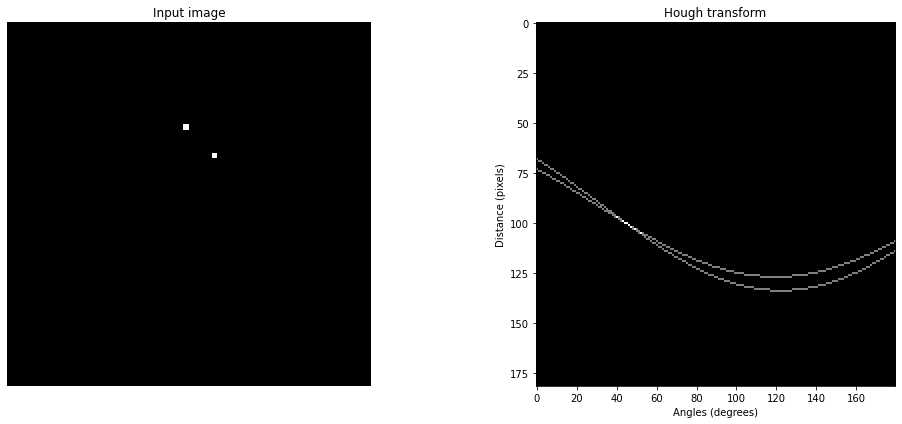

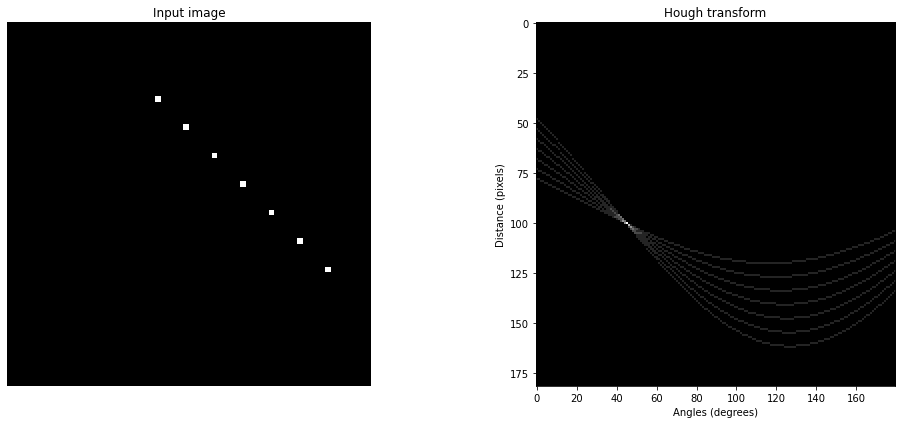

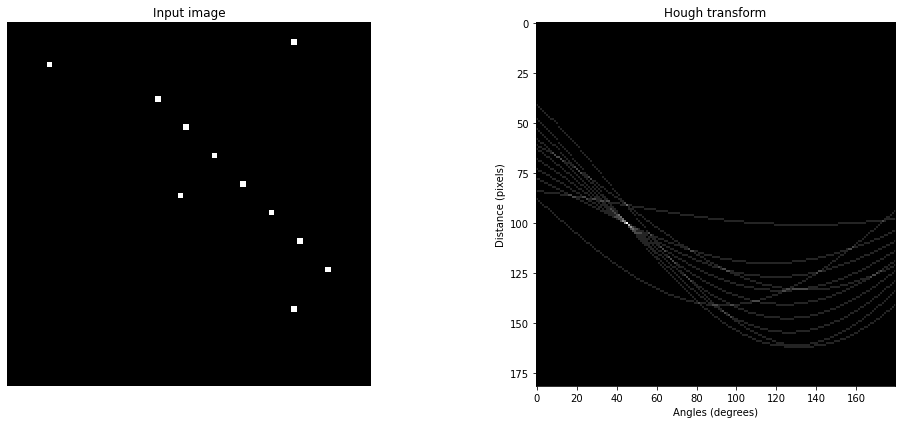

In [3]:
im[23, 36] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

im[13, 26] = 1
im[28, 41] = 1
im[33, 46] = 1
im[38, 51] = 1
im[43, 56] = 1
 
H, theta, rho = hough_line(im)
show_hough(H, im)

im[50, 50] = 1
im[7, 7] = 1
im[30, 30] = 1
im[3, 50] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

Gdy punkty nie są wspóliniowe, to linie transformaty Hougha nie spotykają się w tym samym miejscu.

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

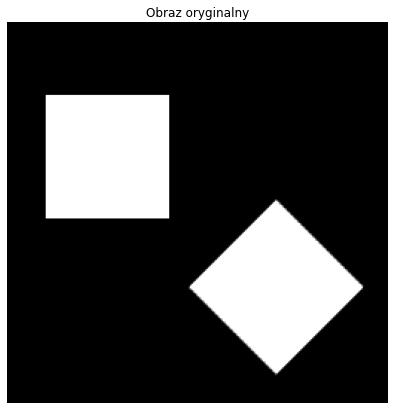

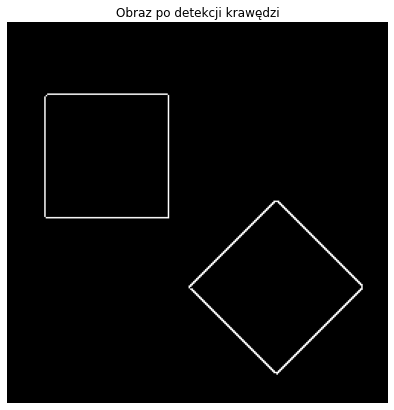

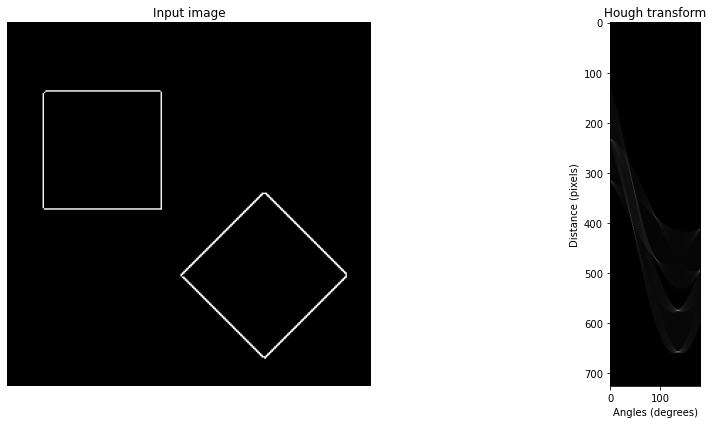


macierz H:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.imshow(kwadraty, cmap='gray')
ax.set_title("Obraz oryginalny")
ax.axis("off")
plt.show()

det_kraw = cv2.Canny(kwadraty, 80, 240, None, 3, 1)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.imshow(det_kraw, cmap='gray')
ax.set_title("Obraz po detekcji krawędzi")
ax.axis("off")
plt.show()

H, theta, rho = hough_line(det_kraw)
show_hough(H, det_kraw)

print("\nmacierz H:\n", H)

Wydaje się, że liczba maksimów jest odpowiednia.

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

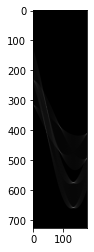

In [5]:
vals, angles, dists = hough_line_peaks(H, theta, rho)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha
plt.show()

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

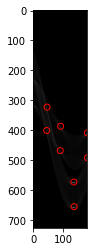

In [6]:
x = np.multiply(dists, np.cos(angles))
y = np.multiply(dists, np.sin(angles))

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

for _, angle, dist in zip(*hough_line_peaks(H, theta, rho)):
    circle = plt.Circle((angle*180/np.pi+90, dist+360), 10, color='r', fill=False)
    ax.add_patch(circle)
plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

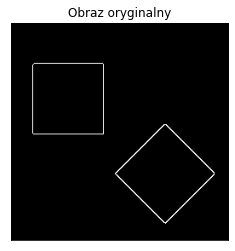

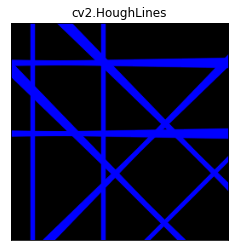

In [7]:
kwadraty2 = cv2.imread('kwadraty.png')
kwadraty2 = cv2.Canny(kwadraty2, 80, 240, None, 3, 1)
plt.imshow(kwadraty2, cmap = 'gray')
plt.title("Obraz oryginalny")
plt.xticks([]), plt.yticks([])
plt.show()

result = cv2.HoughLines(kwadraty2, 1, np.pi / 180, 57)
kwadraty2 = cv2.cvtColor(kwadraty2, cv2.COLOR_GRAY2BGR)

if result is not None:
    for i in range(0, len(result)):
        rho = result[i][0][0]
        theta = result[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(kwadraty2, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(kwadraty2, 'gray')
plt.title("cv2.HoughLines")
plt.xticks([]), plt.yticks([])
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

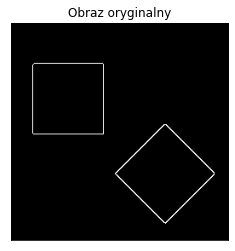

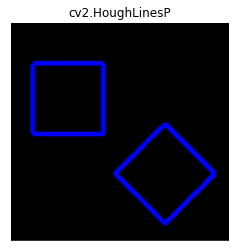

In [8]:
kwadraty2 = cv2.imread('kwadraty.png')
kwadraty2 = cv2.Canny(kwadraty2, 80, 240, None, 3, 1)
plt.imshow(kwadraty2, cmap = 'gray')
plt.title("Obraz oryginalny")
plt.xticks([]), plt.yticks([])
plt.show()

result = cv2.HoughLinesP(kwadraty2, 1, np.pi / 180, 5)
kwadraty2 = cv2.cvtColor(kwadraty2, cv2.COLOR_GRAY2BGR)

if result is not None:
    for i in range(0, len(result)):
        l = result[i][0]
        cv2.line(kwadraty2, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(kwadraty2, 'gray')
plt.title("cv2.HoughLinesP")
plt.xticks([]), plt.yticks([])
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.  
   1. Wczytaj obraz "lab112.png". Wyświetl go.  
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.  
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

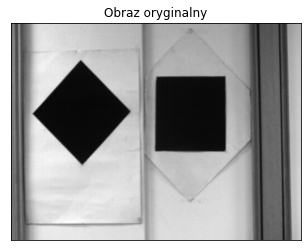

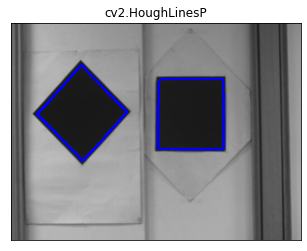

In [9]:
plt.imshow(lab, 'gray')
plt.title("Obraz oryginalny")
plt.xticks([]), plt.yticks([])
plt.show()

lab2 = cv2.imread("lab112.png")

binar = cv2.threshold(lab, 50, 255, cv2.THRESH_BINARY)
dil = cv2.dilate(binar[1], cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=2)
erode = cv2.dilate(dil, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=2)

erode = cv2.Canny(erode, 80, 240, None, 3, 1)

result = cv2.HoughLinesP(erode, 1, np.pi / 180, 5)
erode = cv2.cvtColor(erode, cv2.COLOR_GRAY2BGR)

if result is not None:
    for i in range(0, len(result)):
        l = result[i][0]
        cv2.line(lab2, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(lab2, 'gray')
plt.title("cv2.HoughLinesP")
plt.xticks([]), plt.yticks([])
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

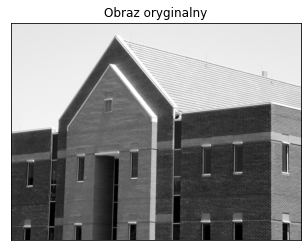

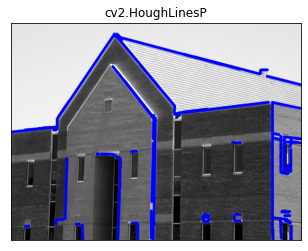

In [10]:
dom = cv2.imread("dom.png", cv2.IMREAD_GRAYSCALE)
dom2 = cv2.imread("dom.png")
plt.imshow(dom, 'gray')
plt.title("Obraz oryginalny")
plt.xticks([]), plt.yticks([])
plt.show()

my_el = np.ones((3, 3))

erode = cv2.erode(dom, my_el, iterations=3)

erode = cv2.Canny(erode, 25000, 50000, None, 7, 1)

result = cv2.HoughLinesP(erode, 1, np.pi / 180, 10, minLineLength=5, maxLineGap = 10)
erode = cv2.cvtColor(erode, cv2.COLOR_GRAY2BGR)

if result is not None:
    for i in range(0, len(result)):
        l = result[i][0]
        cv2.line(dom2, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(dom2, 'gray')
plt.title("cv2.HoughLinesP")
plt.xticks([]), plt.yticks([])
plt.show()